<a href="https://colab.research.google.com/github/EnzoGolfetti/praticas_python/blob/main/pratica_regressao_correlacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Regressão: equação matemática que descreve o relacionamento entre variáveis, pode ser linear, polinomial, logística.

Correlação: grau de relacionamento entre duas variáveis. Varia de -1 a 1.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
tips = sns.load_dataset('tips')

In [4]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Text(0.5, 1.0, 'Relação tips x total bill')

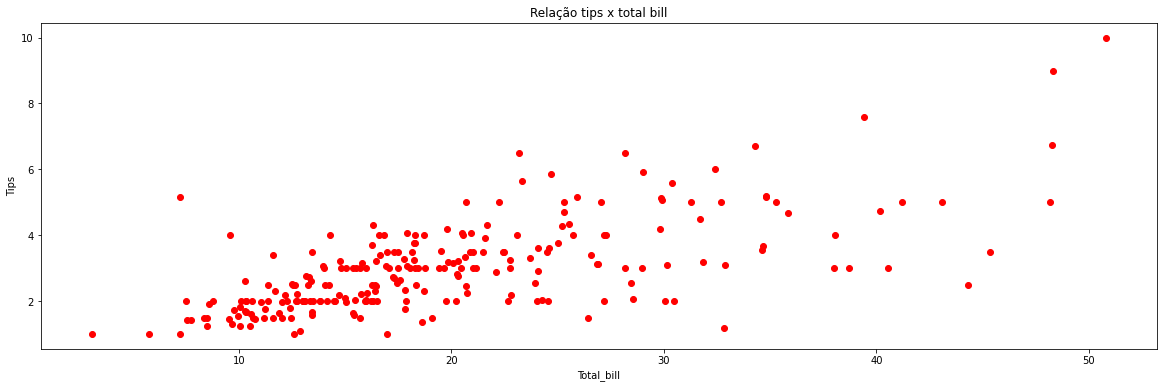

In [5]:
fig, ax = plt.subplots(figsize=(20,6))
plt.style.use('dark_background')
ax.scatter(data=tips, x='total_bill', y='tip', c='red')
ax.set_xlabel('Total_bill')
ax.set_ylabel('Tips')
ax.set_title('Relação tips x total bill')

Coefficients: /n [0.10502452]
intercept: /n 0.9202696135546731


Text(0.5, 1.0, 'Relação tips x total bill')

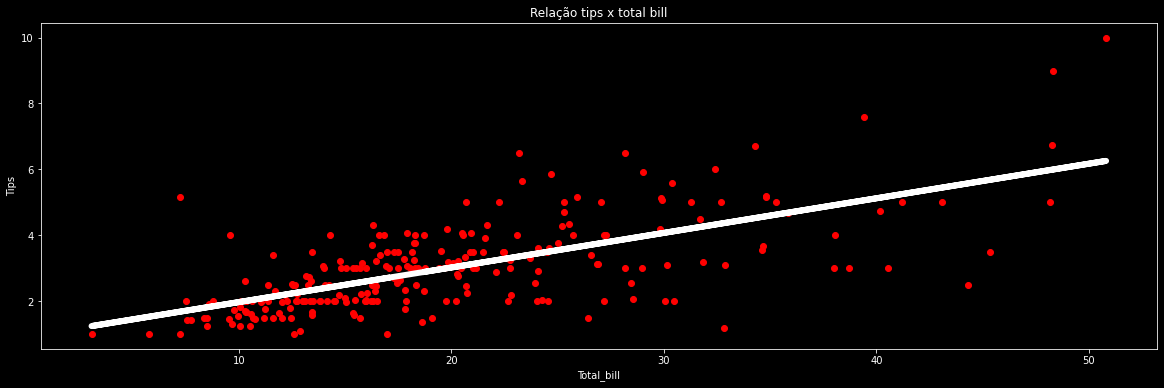

In [6]:
total_bill = np.array(tips['total_bill']) #aparentemente o linear model só aceita np.array, Lembrar de transformar!
tip = np.array(tips['tip'])
reg_tip = linear_model.LinearRegression() #montando a regressão
reg_tip.fit(total_bill.reshape(-1,1), tip)
y = reg_tip.predict(total_bill.reshape(-1,1))

#printando os valores de correlação
print('Coefficients: /n', reg_tip.coef_)
print('intercept: /n', reg_tip.intercept_)


#plotando a regressão e os valores
fig, ax = plt.subplots(figsize=(20,6))
plt.style.use('dark_background')
ax.scatter(total_bill, tip, c='red')
ax.plot(total_bill, y, c='white', lw=6)
ax.set_xlabel('Total_bill')
ax.set_ylabel('Tips')
ax.set_title('Relação tips x total bill')

Para olhar depois: https://medium.com/data-hackers/implementando-regress%C3%A3o-linear-simples-em-python-91df53b920a8

In [ ]:
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


A intenção é analisar mais dados estatíticos sobre a relação total_bill e tip e entender mais sobre a biblioteca statsmodels e estatística no geral com o python.

In [ ]:
#adicionar uma constante à matriz X - total_bill
total_bill_sm = sm.add_constant(total_bill)

# obtendo o Ordinary Least Squares e treinando o modelo
result_total_bill = sm.OLS(tip, total_bill_sm).fit()

# mostrando as estatísticas do modelo
result_total_bill.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     203.4
Date:                Wed, 17 Mar 2021   Prob (F-statistic):           6.69e-34
Time:                        00:47:38   Log-Likelihood:                -350.54
No. Observations:                 244   AIC:                             705.1
Df Residuals:                     242   BIC:                             712.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9203      0.160      5.761      0.000       0.606       1.235
x1             0.1050      0.007     14.260      0.000       0.091       0.120
==============================================================================
Omnibus:                       20.185   Durbin-Watson:                   2.151
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.750
Skew:                           0.443   Prob(JB):                     6.35e-09
Kurtosis:                       4.711   Cond. No.                         53.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""